<a href="https://colab.research.google.com/github/CaptainCloudd/nonmarkov/blob/main/Phase_Damping_Coherence_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import gamma
import pandas as pd
import scipy
from google.colab import files
from scipy.special import gamma, factorial
t_values = np.linspace(0,7,1000)

In [ ]:
def calc_integ(alpha, s, t, num_points=1000):
    w_c = 1
    tau = np.linspace(0, t, num_points)
    gamma = (2 * alpha * math.gamma(s) * np.sin(s * np.arctan(w_c * tau)))/((1 + (w_c * tau)**2)**(s/2))
    integ = np.trapz(y=gamma, x=tau)
    return integ

In [ ]:
def calc_coh(alpha,s):
  coh_values = []
  for t in t_values:
    integ_ = calc_integ(alpha,s,t)
    coh = np.exp(-integ_)
    coh_values.append(coh)
  return coh_values

In [ ]:
def calc_gamma(alpha, s, t, num_points=1000):
    w_c = 1
    tau = np.linspace(0, t, num_points)
    gamma = (2 * alpha * w_c * math.gamma(s) * np.sin(s * np.arctan(w_c * tau)))/((1 + (w_c * tau)**2)**(s/2))
    return gamma

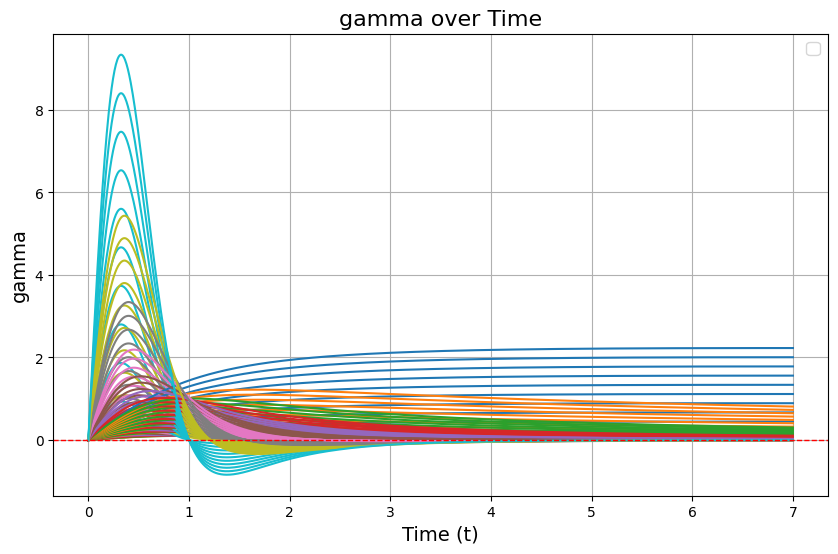

In [ ]:
plt.figure(figsize=(10, 6))
alpha_values = np.linspace(0.1,1,10)
s_values = np.linspace(0.1,4,10)
for alpha in alpha_values:
  for s in s_values:
    gamma_array = []
    for t in t_values:
      gamma = calc_gamma(alpha,s,t)
      gamma_array.append(gamma[-1])
    plt.plot(t_values, gamma_array)
plt.title('gamma over Time', fontsize=16)
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('gamma', fontsize=14)
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend(fontsize=12)
plt.show()



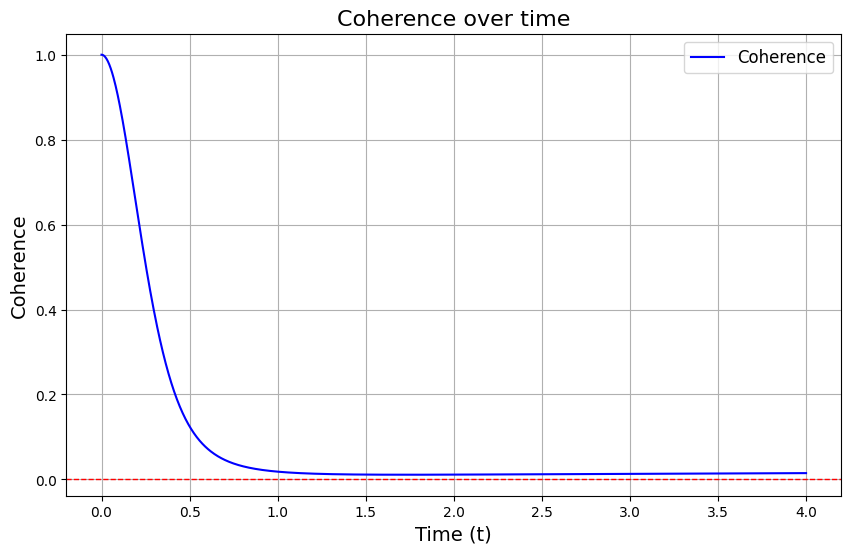

In [ ]:
#Plot único
coherence_plot = calc_coh(2, 3)
plt.figure(figsize=(10, 6))
plt.plot(t_values, coherence_plot, label='Coherence', color='blue')
plt.title('Coherence over time', fontsize=16)
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('Coherence', fontsize=14)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

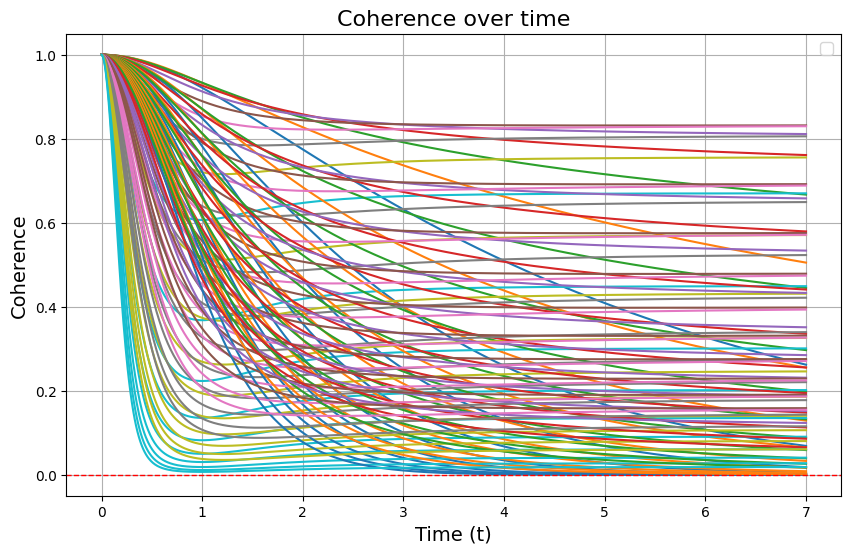

In [ ]:
#Plot múltiplo
plt.figure(figsize=(10, 6))
alpha_values = np.linspace(0.1,1,10)
s_values = np.linspace(0.1,4,10)
for alpha in alpha_values:
    for s in s_values:
        coherence_plot = calc_coh(alpha, s)
        plt.plot(t_values, coherence_plot)
plt.title('Coherence over time', fontsize=16)
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('Coherence', fontsize=14)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [ ]:
results = []
alpha_values = np.linspace(0.1,1,10)
s_values = np.linspace(0.1,4,10)
for alpha in alpha_values:
    for s in s_values:
      coh = calc_coh(alpha,s)
      results.append({'alpha': alpha, 's': s, 'C(t)': coh})
df = pd.DataFrame(results)

In [ ]:
display(df)

,alpha,s,C(t)
0,0.01,0.010000,"[1.0, 0.9999997509217141, 0.9999990036998948, ..."
1,0.01,0.342222,"[1.0, 0.9999997765621899, 0.9999991062666542, ..."
2,0.01,0.674444,"[1.0, 0.99999977353828, 0.9999990941788305, 0...."
3,0.01,1.006667,"[1.0, 0.9999997487918012, 0.9999989952055476, ..."
4,0.01,1.338889,"[1.0, 0.9999997007206967, 0.9999988029418653, ..."
...,...,...,...
95,1.00,1.671111,"[1.0, 0.9999621804097121, 0.9998487395084948, ..."
96,1.00,2.003333,"[1.0, 0.999949747920864, 0.9997990219656196, 0..."
97,1.00,2.335556,"[1.0, 0.9999302493629497, 0.999721051900363, 0..."
98,1.00,2.667778,"[1.0, 0.9998993734334349, 0.9995975976188554, ..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
csv_filename = 'coherence_results.csv'
df.to_csv(csv_filename, index=False)
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1002,)

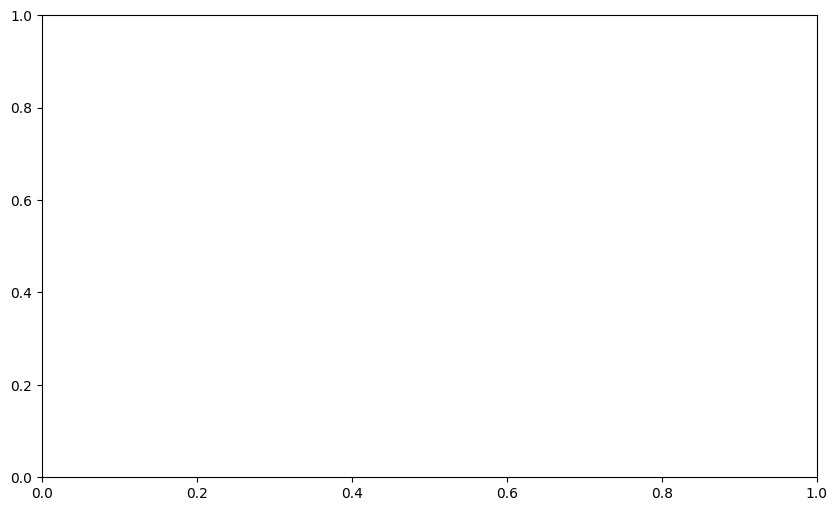

In [ ]:
plt.figure(figsize=(10, 6))
alpha_values = [0.5]
s_values = [3]
for alpha in alpha_values:
    for s in s_values:
        coherence_plot = calc_coh(alpha, s)
        gamma = calc_gamma(alpha,s,t)
        gamma_array.append(gamma[-1])
      plt.plot(t_values, gamma_array, label=f'alpha={alpha}, s={s}')
plt.title('Coherence over time', fontsize=16)
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('Coherence', fontsize=14)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()